Example from https://www.districtdatalabs.com/altair-choropleth-viz

In [9]:
import altair as alt
import requests
import pandas as pd
import geopandas as gpd
import json
from vega_datasets import data

alt.renderers.enable('notebook')
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

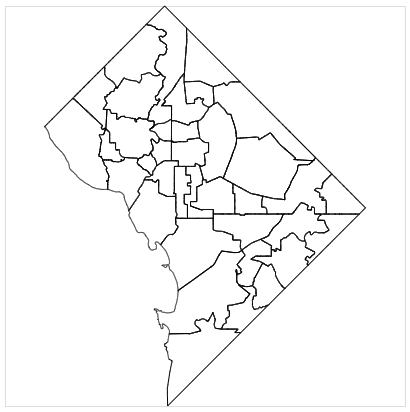

In [10]:
def download_json():
    '''Downloads ANC JSON from Open Data DC'''
    url = "https://opendata.arcgis.com/datasets/bfe6977cfd574c2b894cd67cf6a787c3_2.geojson"
    resp = requests.get(url)
    return resp.json()

def gen_base(geojson):
    '''Generates baselayer of DC ANC map'''
    base = alt.Chart(alt.Data(values=geojson)).mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
    ).properties(
        width=400,
        height=400
    )
    return base

anc_json = download_json()
base_layer = gen_base(geojson=anc_json)
base_layer

In [11]:
gdf = gpd.GeoDataFrame.from_features((anc_json))
gdf.head()

geometry  OBJECTID ANC_ID  \
0  POLYGON ((-77.02801250848196 38.96126685738813...         1     4C   
1  POLYGON ((-77.01787596864135 38.95766774981324...         2     4D   
2  POLYGON ((-77.01824302717323 38.92852061963107...         3     1B   
3  POLYGON ((-77.03847471278722 38.91701117992299...         4     2B   
4  POLYGON ((-77.00591806003315 38.88981961048005...         5     6B   

                                           WEB_URL    NAME  SHAPE_Length  \
0  http://app.anc.dc.gov/wards.asp?ward=4&office=C  ANC 4C  10341.699937   
1  http://app.anc.dc.gov/wards.asp?ward=4&office=D  ANC 4D   6421.433702   
2  http://app.anc.dc.gov/wards.asp?ward=1&office=B  ANC 1B   7418.871696   
3  http://app.anc.dc.gov/wards.asp?ward=2&office=B  ANC 2B   7713.349828   
4  http://app.anc.dc.gov/wards.asp?ward=6&office=B  ANC 6B  10778.799866   

     SHAPE_Area  
0  3.344032e+06  
1  1.842719e+06  
2  2.747224e+06  
3  2.160268e+06  
4  4.899464e+06

In [13]:
pop_df = pd.read_csv('https://raw.githubusercontent.com/msussman/Altair_Demo/master/data/anc_population.csv')
gdf = gdf.merge(pop_df, on='ANC_ID', how='inner')
gdf.head()

geometry  OBJECTID ANC_ID  \
0  POLYGON ((-77.02801250848196 38.96126685738813...         1     4C   
1  POLYGON ((-77.01787596864135 38.95766774981324...         2     4D   
2  POLYGON ((-77.01824302717323 38.92852061963107...         3     1B   
3  POLYGON ((-77.03847471278722 38.91701117992299...         4     2B   
4  POLYGON ((-77.00591806003315 38.88981961048005...         5     6B   

                                           WEB_URL    NAME  SHAPE_Length  \
0  http://app.anc.dc.gov/wards.asp?ward=4&office=C  ANC 4C  10341.699937   
1  http://app.anc.dc.gov/wards.asp?ward=4&office=D  ANC 4D   6421.433702   
2  http://app.anc.dc.gov/wards.asp?ward=1&office=B  ANC 1B   7418.871696   
3  http://app.anc.dc.gov/wards.asp?ward=2&office=B  ANC 2B   7713.349828   
4  http://app.anc.dc.gov/wards.asp?ward=6&office=B  ANC 6B  10778.799866   

     SHAPE_Area  pop_2000  pop_2010 pop_diff  pop_diff_perc  
0  3.344032e+06     19579     20330      751          0.038  
1  1.842719e+06     12341     12463      122          0.010  
2  2.747224e+06     21640     25111    3,471          0.160  
3  2.160268e+06     17867     18117      249          0.014  
4  4.899464e+06     21364     23847    2,483          0.116

In [14]:
gdf['centroid_lon'] = gdf['geometry'].centroid.x
gdf['centroid_lat'] = gdf['geometry'].centroid.y
gdf.head()

geometry  OBJECTID ANC_ID  \
0  POLYGON ((-77.02801250848196 38.96126685738813...         1     4C   
1  POLYGON ((-77.01787596864135 38.95766774981324...         2     4D   
2  POLYGON ((-77.01824302717323 38.92852061963107...         3     1B   
3  POLYGON ((-77.03847471278722 38.91701117992299...         4     2B   
4  POLYGON ((-77.00591806003315 38.88981961048005...         5     6B   

                                           WEB_URL    NAME  SHAPE_Length  \
0  http://app.anc.dc.gov/wards.asp?ward=4&office=C  ANC 4C  10341.699937   
1  http://app.anc.dc.gov/wards.asp?ward=4&office=D  ANC 4D   6421.433702   
2  http://app.anc.dc.gov/wards.asp?ward=1&office=B  ANC 1B   7418.871696   
3  http://app.anc.dc.gov/wards.asp?ward=2&office=B  ANC 2B   7713.349828   
4  http://app.anc.dc.gov/wards.asp?ward=6&office=B  ANC 6B  10778.799866   

     SHAPE_Area  pop_2000  pop_2010 pop_diff  pop_diff_perc  centroid_lon  \
0  3.344032e+06     19579     20330      751          0.038    -77.027911   
1  1.842719e+06     12341     12463      122          0.010    -77.018234   
2  2.747224e+06     21640     25111    3,471          0.160    -77.024453   
3  2.160268e+06     17867     18117      249          0.014    -77.040645   
4  4.899464e+06     21364     23847    2,483          0.116    -76.987266   

   centroid_lat  
0     38.945261  
1     38.951656  
2     38.921205  
3     38.908462  
4     38.883534

In [15]:
choro_json = json.loads(gdf.to_json())
choro_data = alt.Data(values=choro_json['features'])

In [18]:
choro_data

Data({
  values: [{'id': '0', 'type': 'Feature', 'properties': {'ANC_ID': '4C', 'NAME': 'ANC 4C', 'OBJECTID': 1, 'SHAPE_Area': 3344031.61921237, 'SHAPE_Length': 10341.699937045214, 'WEB_URL': 'http://app.anc.dc.gov/wards.asp?ward=4&office=C', 'centroid_lat': 38.945261014166746, 'centroid_lon': -77.02791052216502, 'pop_2000': 19579, 'pop_2010': 20330, 'pop_diff': '751', 'pop_diff_perc': 0.038}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-77.02801250848196, 38.961266857388125], [-77.02836484456894, 38.96131720066085], [-77.02852191299006, 38.961346232093675], [-77.02851045986836, 38.961299121704926], [-77.02850929811504, 38.961279267790474], [-77.02851390433268, 38.96125670999234], [-77.02852735708905, 38.96122620475328], [-77.0285380694167, 38.96120980711159], [-77.0285498318863, 38.96119385962532], [-77.02856241373549, 38.96117836235043], [-77.02857602268573, 38.96116340531857], [-77.02859055485776, 38.96114889847216], [-77.0287550263459, 38.96099616817955], [-77.02899087975838,

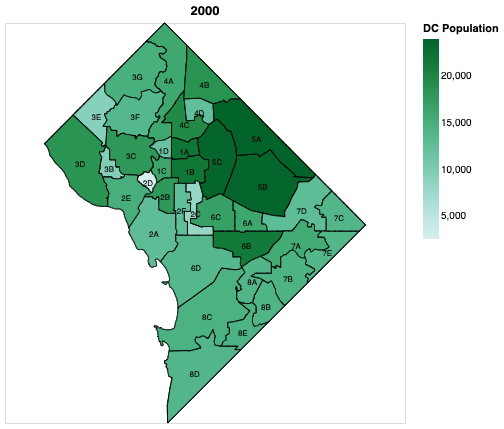

In [16]:
def gen_map(geodata, color_column, title):
    '''Generates DC ANC map with population choropleth and ANC labels'''
    # Add Base Layer
    base = alt.Chart(geodata, title = title).mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
    ).properties(
        width=400,
        height=400
    )
    # Add Choropleth Layer
    choro = alt.Chart(geodata).mark_geoshape(
        fill='lightgray',
        stroke='black'
    ).encode(
        alt.Color(color_column, 
                  type='quantitative', 
                  scale=alt.Scale(scheme='bluegreen'),
                  title = "DC Population")
    )
    # Add Labels Layer
    labels = alt.Chart(geodata).mark_text(baseline='top'
     ).properties(
        width=400,
        height=400
     ).encode(
         longitude='properties.centroid_lon:Q',
         latitude='properties.centroid_lat:Q',
         text='properties.ANC_ID:O',
         size=alt.value(8),
         opacity=alt.value(1)
     )

    return base + choro + labels

pop_2000_map = gen_map(geodata=choro_data, color_column='properties.pop_2000', title='2000')
pop_2000_map

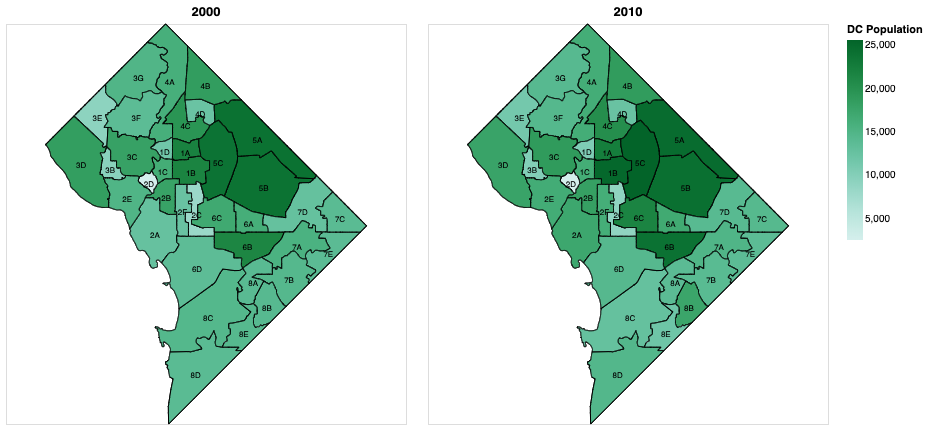

In [19]:
pop_2010_map = gen_map(geodata=choro_data, color_column='properties.pop_2010', title='2010')
fig = pop_2000_map | pop_2010_map
fig